<a href="https://colab.research.google.com/github/NavaponS/Comparative-Analysis-of-Three-Data-Mining-Techniques-for-Water-Quality-Prediction/blob/main/Comparative_Analysis_of_Three_Data_Mining_Techniques_for_Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Read Data**

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Description**
All attributes are numeric variables and they are listed below:

aluminium - dangerous if greater than 2.8


ammonia - dangerous if greater than 32.5


arsenic - dangerous if greater than 0.01


barium - dangerous if greater than 2


cadmium - dangerous if greater than 0.005


chloramine - dangerous if greater than 4


chromium - dangerous if greater than 0.1


copper - dangerous if greater than 1.3


flouride - dangerous if greater than 1.5


bacteria - dangerous if greater than 0


viruses - dangerous if greater than 0


lead - dangerous if greater than 0.015


nitrates - dangerous if greater than 10


nitrites - dangerous if greater than 1


mercury - dangerous if greater than 0.002


perchlorate - dangerous if greater than 56


radium - dangerous if greater than 5


selenium - dangerous if greater than 0.5


silver - dangerous if greater than 0.1


uranium - dangerous if greater than 0.3


is_safe - class attribute {0 - not safe, 1 - safe}

In [86]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Project/water quality/waterQuality1.csv',delimiter=',')

In [87]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


# **Prepare Data**

> Check null

In [88]:
df.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


> Check Dtype

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

* ammonia ควรเป็น float
* is_safe ควรเป็น int

> select rows and change data type

In [90]:
df['ammonia'].value_counts()['#NUM!']
df = df[df['ammonia'].str.contains('#NUM!') == False]

In [91]:
df['ammonia'] = pd.to_numeric(df['ammonia'])
df['is_safe'] = pd.to_numeric(df['is_safe'])
df.dtypes

<ipython-input-91-d9d053f2315e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ammonia'] = pd.to_numeric(df['ammonia'])
<ipython-input-91-d9d053f2315e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_safe'] = pd.to_numeric(df['is_safe'])


,0
aluminium,float64
ammonia,float64
arsenic,float64
barium,float64
cadmium,float64
chloramine,float64
chromium,float64
copper,float64
flouride,float64
bacteria,float64


> Check min max

In [92]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


min ammonia ไม่ควรต่ำกว่า 0

> Drop ammonia rows below 0

In [93]:
df = df[df['ammonia'] >= 0]

In [94]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,...,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000
mean,0.665681,14.296141,0.161008,1.566062,0.042744,2.176069,0.247029,0.806018,0.771726,0.319500,...,0.099479,9.816521,1.329284,0.005190,16.463139,2.917437,0.049691,0.147646,0.044668,0.113949
std,1.265231,8.870009,0.252244,1.214996,0.036022,2.567149,0.270617,0.653397,0.435538,0.329427,...,0.058138,5.542970,0.573313,0.002967,17.694342,2.322175,0.028781,0.143522,0.026902,0.317770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.600000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.402500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.150000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.925000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.150000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.502500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [114]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


> Check Class

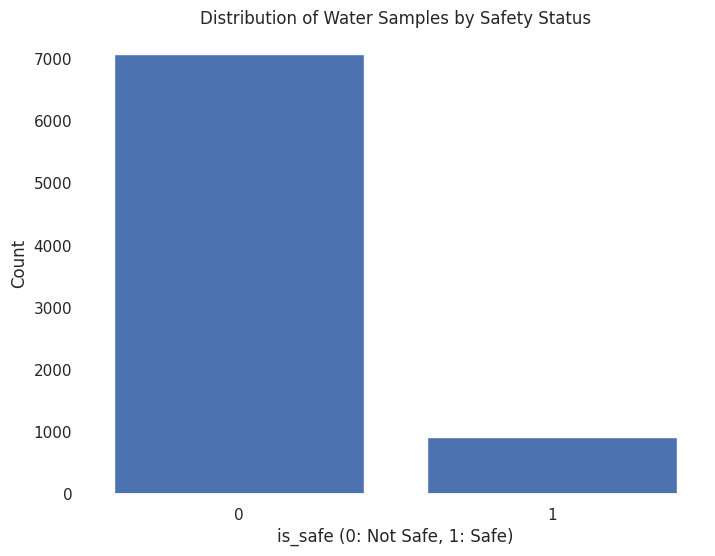

In [168]:
import matplotlib.pyplot as plt

is_safe_counts = df['is_safe'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(is_safe_counts.index, is_safe_counts.values)
plt.xlabel('is_safe (0: Not Safe, 1: Safe)')
plt.ylabel('Count')
plt.title('Distribution of Water Samples by Safety Status')
plt.xticks(is_safe_counts.index)
plt.show()

Imbalance class

> SMOTE Class

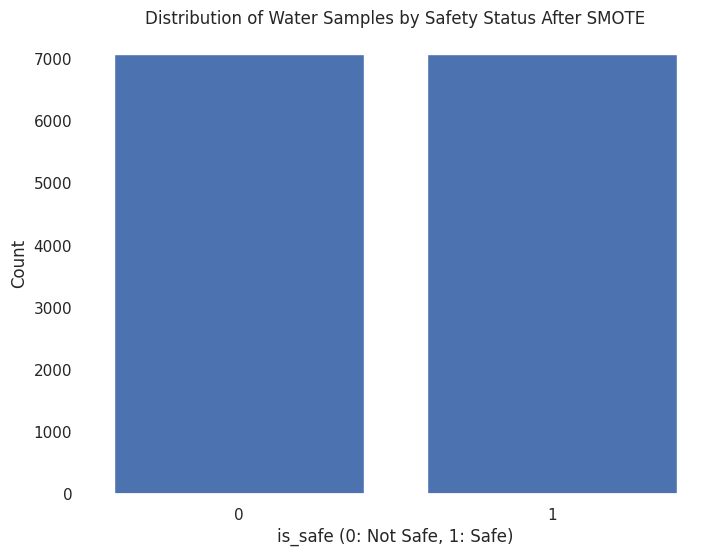

In [170]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('is_safe', axis=1)
y = df['is_safe']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['is_safe'] = y_resampled

# Check the class distribution after SMOTE
is_safe_counts_resampled = df_resampled['is_safe'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(is_safe_counts_resampled.index, is_safe_counts_resampled.values)
plt.xlabel('is_safe (0: Not Safe, 1: Safe)')
plt.ylabel('Count')
plt.title('Distribution of Water Samples by Safety Status After SMOTE')
plt.xticks(is_safe_counts_resampled.index)
plt.show()

df = df_resampled

# **Split data hold-out 70/30**

In [171]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.values[:,0:20]
Y = df.values[:,20]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

# **Model**

## **Decision Tree**

> GridSearchCV for max_depth

In [183]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(1, 16)}

# Create a DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5) # You can adjust cv (cross-validation folds)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator (Decision Tree with the best hyperparameters)
best_dtree = grid_search.best_estimator_

# Evaluate the best model on the test set
from sklearn.metrics import accuracy_score
y_pred = best_dtree.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best hyperparameters: {'max_depth': 10}
Best score: 0.947002069610849
Test Accuracy: 0.9524258125294395


> Decision tree Model

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=10)
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

> Decision tree Report

In [196]:
from sklearn.metrics import classification_report

y_pred = clf_gini.predict(X_test)
Dtree = classification_report(Y_test, y_pred)
print(Dtree)

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      2139
         1.0       0.94      0.97      0.95      2107

    accuracy                           0.95      4246
   macro avg       0.95      0.95      0.95      4246
weighted avg       0.95      0.95      0.95      4246



## **Naive Bayes**

> Naive Bayes Model

In [197]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

> Naive Bayes Report

In [198]:
y_pred = gnb.predict(X_test)
NB = classification_report(Y_test, y_pred)
print(NB)

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      2139
         1.0       0.80      0.79      0.79      2107

    accuracy                           0.79      4246
   macro avg       0.79      0.79      0.79      4246
weighted avg       0.79      0.79      0.79      4246



## **neural_network MLP**

> GridSearchCV for hidden_layer_sizes, solver, and alpha

In [190]:
from sklearn.neural_network import MLPClassifier

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Example hidden layer sizes
    'solver': ['lbgfs', 'adam', 'sgd'],  # Solvers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
}

# Create an MLPClassifier
mlp = MLPClassifier(max_iter=500) # Increased max_iter for convergence

# Create a GridSearchCV object for MLP
mlp_grid_search = GridSearchCV(mlp, mlp_param_grid, cv=5, n_jobs=-1) # n_jobs=-1 uses all processors

# Fit the grid search to the training data
mlp_grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding score
print("Best MLP hyperparameters:", mlp_grid_search.best_params_)
print("Best MLP score:", mlp_grid_search.best_score_)

# Get the best estimator (MLP with the best hyperparameters)
best_mlp = mlp_grid_search.best_estimator_

# Evaluate the best MLP model on the test set
mlp_y_pred = best_mlp.predict(X_test)
mlp_accuracy = accuracy_score(Y_test, mlp_y_pred)
print(f"MLP Test Accuracy: {mlp_accuracy}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best MLP hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best MLP score: 0.9480114569744561
MLP Test Accuracy: 0.9526613283089967


> MLP Model

In [191]:
clf = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(100,), random_state=42)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

> MLP Report

In [192]:
mlp_report = classification_report(Y_test, mlp_y_pred)
print(mlp_report)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      2139
         1.0       0.93      0.98      0.95      2107

    accuracy                           0.95      4246
   macro avg       0.95      0.95      0.95      4246
weighted avg       0.95      0.95      0.95      4246



## **Comparison of Three Algorithms**

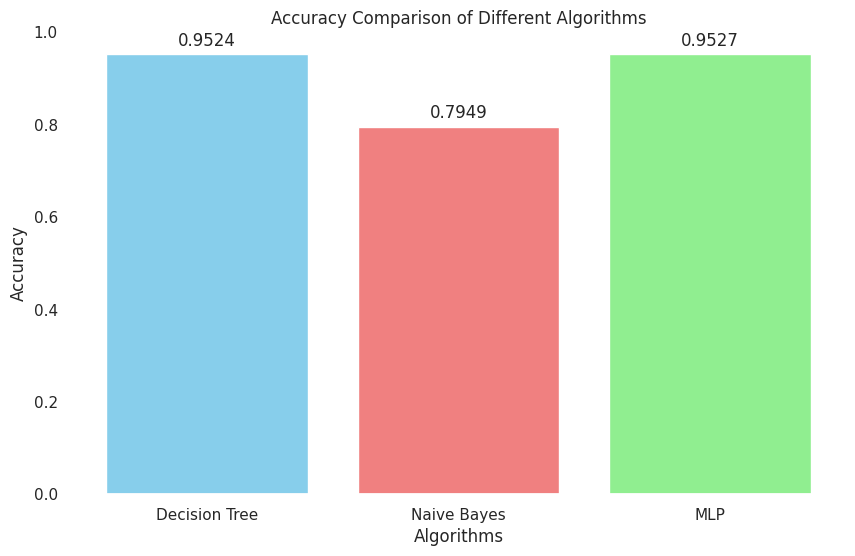

In [200]:
import matplotlib.pyplot as plt

# Assuming accuracy values are stored in a dictionary
accuracy_scores = {
    'Decision Tree': accuracy,
    'Naive Bayes': accuracy_score(Y_test, y_pred),
    'MLP': mlp_accuracy
}

algorithms = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(algorithms, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Algorithms")
plt.ylim(0, 1)

# Add accuracy values on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', va='bottom')

plt.show()

MLP is the best. But it still can be better with more hyperparameters 😀